<a href="https://colab.research.google.com/github/RithikaAR/admeeted-chatroom/blob/master/ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   **CS205 - Activity 2**
## Rithika Ramasesha , Poorvaja Sundar

&nbsp;

In this this tutorial we will using a dataset called *phising.csv*.

The first step is to *prepare* the dataset and this includes collecting data, cleaning it and manipulating the data. Then, we train the model using *supervised learning models*: logistic regression. Next, we will be implementing naive bayes model. Finally we test the data and optimize the model.

&nbsp;

For this tutorial, we are using different libraries: 
* Pandas (https://pandas.pydata.org/) to manipulate datasets,
* other library to help with already implement function and attributes like Matplotlib (https://matplotlib.org/), Numpy (http://www.numpy.org/) but also Seaborn (https://seaborn.pydata.org/).


Before starting this tutorial, make sure that you imported the dataset in the files used by Google collab.

It is a good practice to import all the libraries at the beginning of the code.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
#print(os.listdir())

import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv("/home/poorvaja/Downloads/ai/dataset.csv")

#  **Data Collection** 

In this tutorial, we are using the dataset *phising.csv* .

Make sure that the 'phising.csv' is imported in the files used by this notebook, otherwise it is not going to be read.

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(11055, 32)

In [ ]:
dataset.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [ ]:
dataset.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 1    6157
-1    4898
Name: Result, dtype: int64


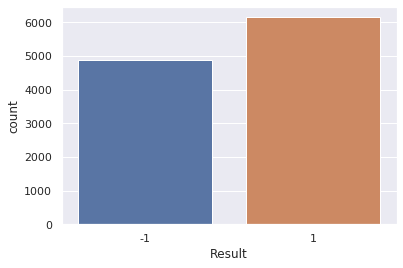

In [ ]:
y = dataset["Result"]

sns.countplot(y)


target_temp = dataset.Result.value_counts()

print(target_temp)

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("Result",axis=1)
target = dataset["Result"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

# **Naïve Bayes Algorithm**

Naïve Bayes algorithms is a classification technique based on applying Bayes’ theorem with a strong assumption that all the predictors are independent to each other. The assumption is that the presence of a feature in a class is independent to the presence of any other feature in the same class.

In Bayesian classification, the main interest is to find the posterior probabilities i.e. the probability of a label given some observed features, **𝑃(𝐿 | 𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠)**. With the help of Bayes theorem, we can express this in quantitative form as follows −

**P(L|features) = P(L) / P(features|L)P(features)**

**(𝐿 | 𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠)** is the posterior probability of class.

**𝑃(𝐿)** is the prior probability of class.

**𝑃(𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠|𝐿)** is the likelihood which is the probability of predictor given class.

**𝑃(𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠)** is the prior probability of predictor.



 ### **Three types of Naïve Bayes model :**

**Gaussian Naïve Bayes:**

It is the simplest Naïve Bayes classifier having the assumption that the data from each label is drawn from a simple Gaussian distribution.

**Multinomial Naïve Bayes**

Another useful Naïve Bayes classifier is Multinomial Naïve Bayes in which the features are assumed to be drawn from a simple Multinomial distribution. Such kind of Naïve Bayes are most appropriate for the features that represents discrete counts.

**Bernoulli Naïve Bayes**

Another important model is Bernoulli Naïve Bayes in which features are assumed to be binary (0s and 1s). Text classification with ‘bag of words’ model can be an application of Bernoulli Naïve Bayes.

**Advantages of Naive Bayes :**

* Naïve Bayes classification is easy to implement and fast.

* It will converge faster than discriminative models like logistic regression.

* It requires less training data.

* It is highly scalable in nature, or they scale linearly with the number of predictors and data points.

* It can make probabilistic predictions and can handle continuous as well as discrete data.

* Naïve Bayes classification algorithm can be used for binary as well as multi-class classification problems both.

**Disadvantages of Naive Bayes :**

* One of the most important cons of Naïve Bayes classification is its strong feature independence because in real life it is almost impossible to have a set of features which are completely independent of each other.

* Another issue with Naïve Bayes classification is its ‘zero frequency’ which means that if a categorial variable has a category but not being observed in training data set, then Naïve Bayes model will assign a zero probability to it and it will be unable to make a prediction.

**Application of Naive Bayes :**
* Spam-filtering 
* Sentiment analysis
* Recommendation system 


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 88.01 %


#**Logistic regression**

Logistic regression is a supervised learning algorithm which is used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.
 The dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no). It is a classification algorithm.

A logistic regression model predicts  **P(Y=1)** as a function of ***X***. This algorithm is use to solve classification problems such as spam detection, Diabetes prediction, cancer detection etc.

### **Types of Logistic Regression**
There are 3 types of Logistic regression based on targetted variables. They are:
 
**Binary or Binomial :**

In this type, a dependent variable will have only two possible types either 1 and 0. For example, these variables may represent success or failure, yes or no, win or loss etc.

**Multinomial :**

In this type, dependent variable can have 3 or more possible unordered types or the types having no quantitative significance. For example, these variables may represent “Type A” or “Type B” or “Type C”.

**Ordinal :**

In this type , dependent variable can have 3 or more possible ordered types or the types having a quantitative significance. For example, these variables may represent “bad” or “good”, “Average”, “Excellent” and each category can have the scores like 0,1,2,3.

### **Logistic Regression Assumptions**

*   Before diving into the implementation of logistic regression, we must be aware of the following assumptions about the same .
*   In case of binary logistic regression, the target variables must be binary always and the desired outcome is represented by the factor level 1
*    There should not be any multi-collinearity in the model, which means the independent variables must be independent of each other.
*    We must include meaningful variables in our model.
*    We should choose a large sample size for logistic regression.


**Different types of Regression Models**

**Binary Logistic Regression Model :**

 The simplest form of logistic regression is binary or binomial logistic regression in which the target or dependent variable can have only 2 possible types either 1 or 0.

**Multinomial Logistic Regression Model :**

 Another useful form of logistic regression is multinomial logistic regression in which the target or dependent variable can have 3 or more possible unordered types i.e. the types having no quantitative significance.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 91.77 %


## Results

The accuracies achieved from Naive Bayes and Logistic Regression are compared.

The accuracy score of Naive Bayes  is 88.01%.
The aacuracy score of Logistic Regression is 91.77% .
It can be seen that Logistic Regression is better than Naive Bayes.




In [ ]:
scores = [score_nb,score_lr]
algorithms = ["Naive Bayes","Logistic Regression"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Naive Bayes is: 88.01 %
The accuracy score achieved using Logistic Regression is: 91.77 %


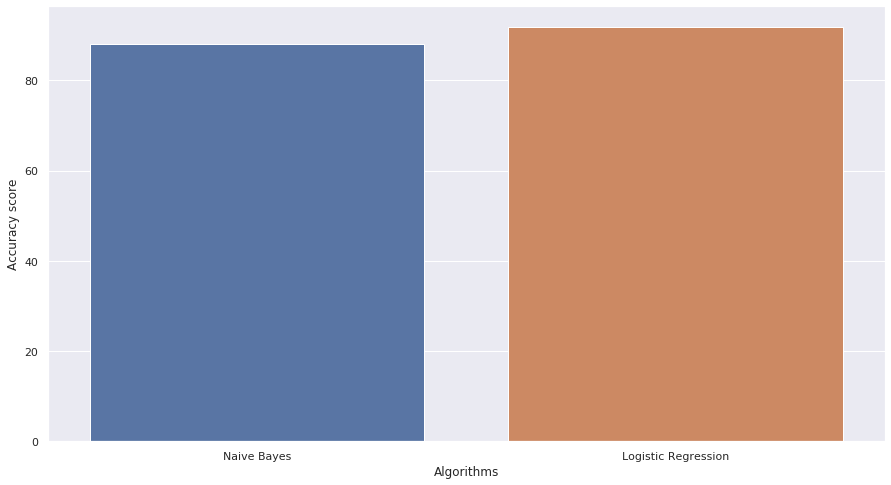

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)